In [4]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: absl-py>=1.0.0 in c:\users\frank\anaconda3\lib\site-packages (from tensorflow-intel==2.17.0->tensorflow) (2.1.0)



  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords
import re

# Download NLTK stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the dataset
data = pd.read_csv(r"C:\Users\frank\OneDrive\Desktop\Internship\IMDB Dataset.csv")

# Preprocess the data
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text) # Remove HTML tags
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

x= data['review'].apply(preprocess_text)
x

# Convert sentiment to binary values
y= data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
y


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\frank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Vectorize the data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)



In [14]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8871
Confusion Matrix:
[[4329  632]
 [ 497 4542]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



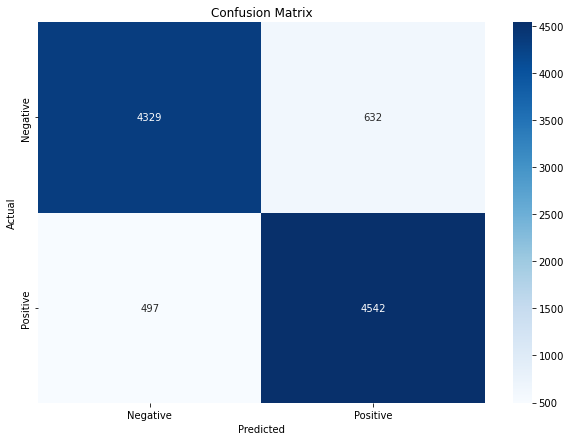

In [16]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1]:
from flask import Flask, request, jsonify, render_template

In [7]:
app = Flask(__name__)

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    review = request.form['review']
    processed_review = preprocess_text(review)
    review_vec = vectorizer.transform([processed_review])
    prediction = model.predict(review_vec)
    sentiment = 'Positive' if prediction[0] == 1 else 'Negative'
    return render_template('index.html', prediction_text=f'Sentiment: {sentiment}')

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\frank\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from werkzeug.serving import run_simple

# Define host and port
host = 'localhost'
port = 5000

# Run Flask app
run_simple(host, port, app)


 * Running on http://localhost:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Jul/2024 21:39:36] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Jul/2024 21:39:50] "POST /predict HTTP/1.1" 200 -
